/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21040 (\N{CJK UNIFIED IDEOGRAPH-5230}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Version

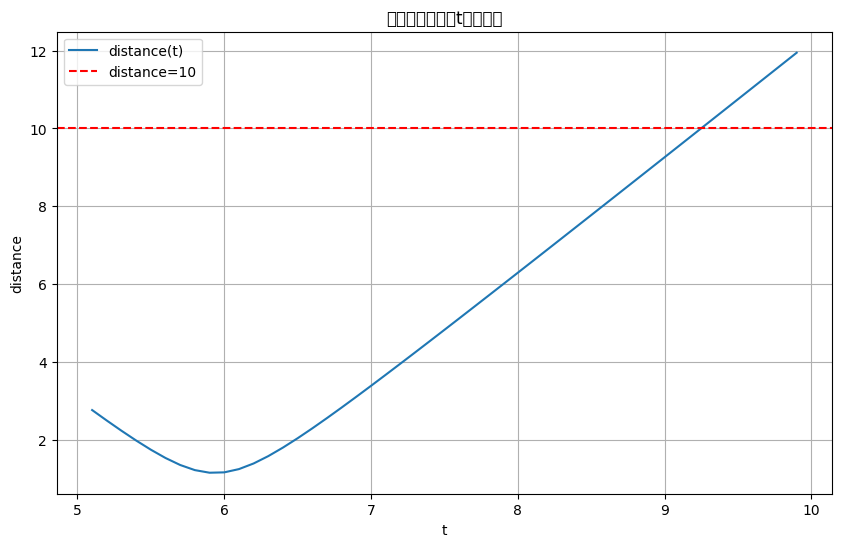

精确解 t = 9.2486


In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
def point_to_line_distance_3d_sym(point, line_p1, line_p2):
    """
    支持符号运算的三维空间点到直线距离
    """
    p0 = sp.Matrix(point)
    p1 = sp.Matrix(line_p1)
    p2 = sp.Matrix(line_p2)
    v = p2 - p1
    ap = p0 - p1
    cross = ap.cross(v)
    distance = cross.norm() / v.norm()
    return distance

# 定义符号
t = sp.symbols('t')
fy1 = (17188, 0, 1736.496-3*t)# fy1的坐标
m = (20000 - 3000*t/sp.sqrt(101), 0, 2000 - 300*t/sp.sqrt(101))#m的坐标
line_p1 = (0, 20, 0)

distance_expr = point_to_line_distance_3d_sym(fy1, line_p1, m)# 这个是烟雾弹中心到视线所在直线的距离

# 生成 t 和 distance 数值
t_vals = np.arange(5.1, 10, 0.1)
distance_vals = [float(distance_expr.subs(t, tv)) for tv in t_vals]

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(t_vals, distance_vals, label='distance(t)')
plt.axhline(10, color='r', linestyle='--', label='distance=10')
plt.xlabel('t')
plt.ylabel('distance')
plt.title('点到直线距离随t变化图像')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

f = lambda x: float(distance_expr.subs(t, x) - 10)
result = root_scalar(f, bracket=[9, 9.5])
if result.converged:
    print("精确解 t =", round(result.root, 4))
else:
    print("未找到解")